<a href="https://colab.research.google.com/github/karthikasi/Task-6/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df.shape

(804, 12)

In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [ ]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


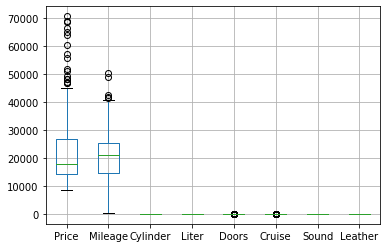

In [ ]:
df.boxplot()

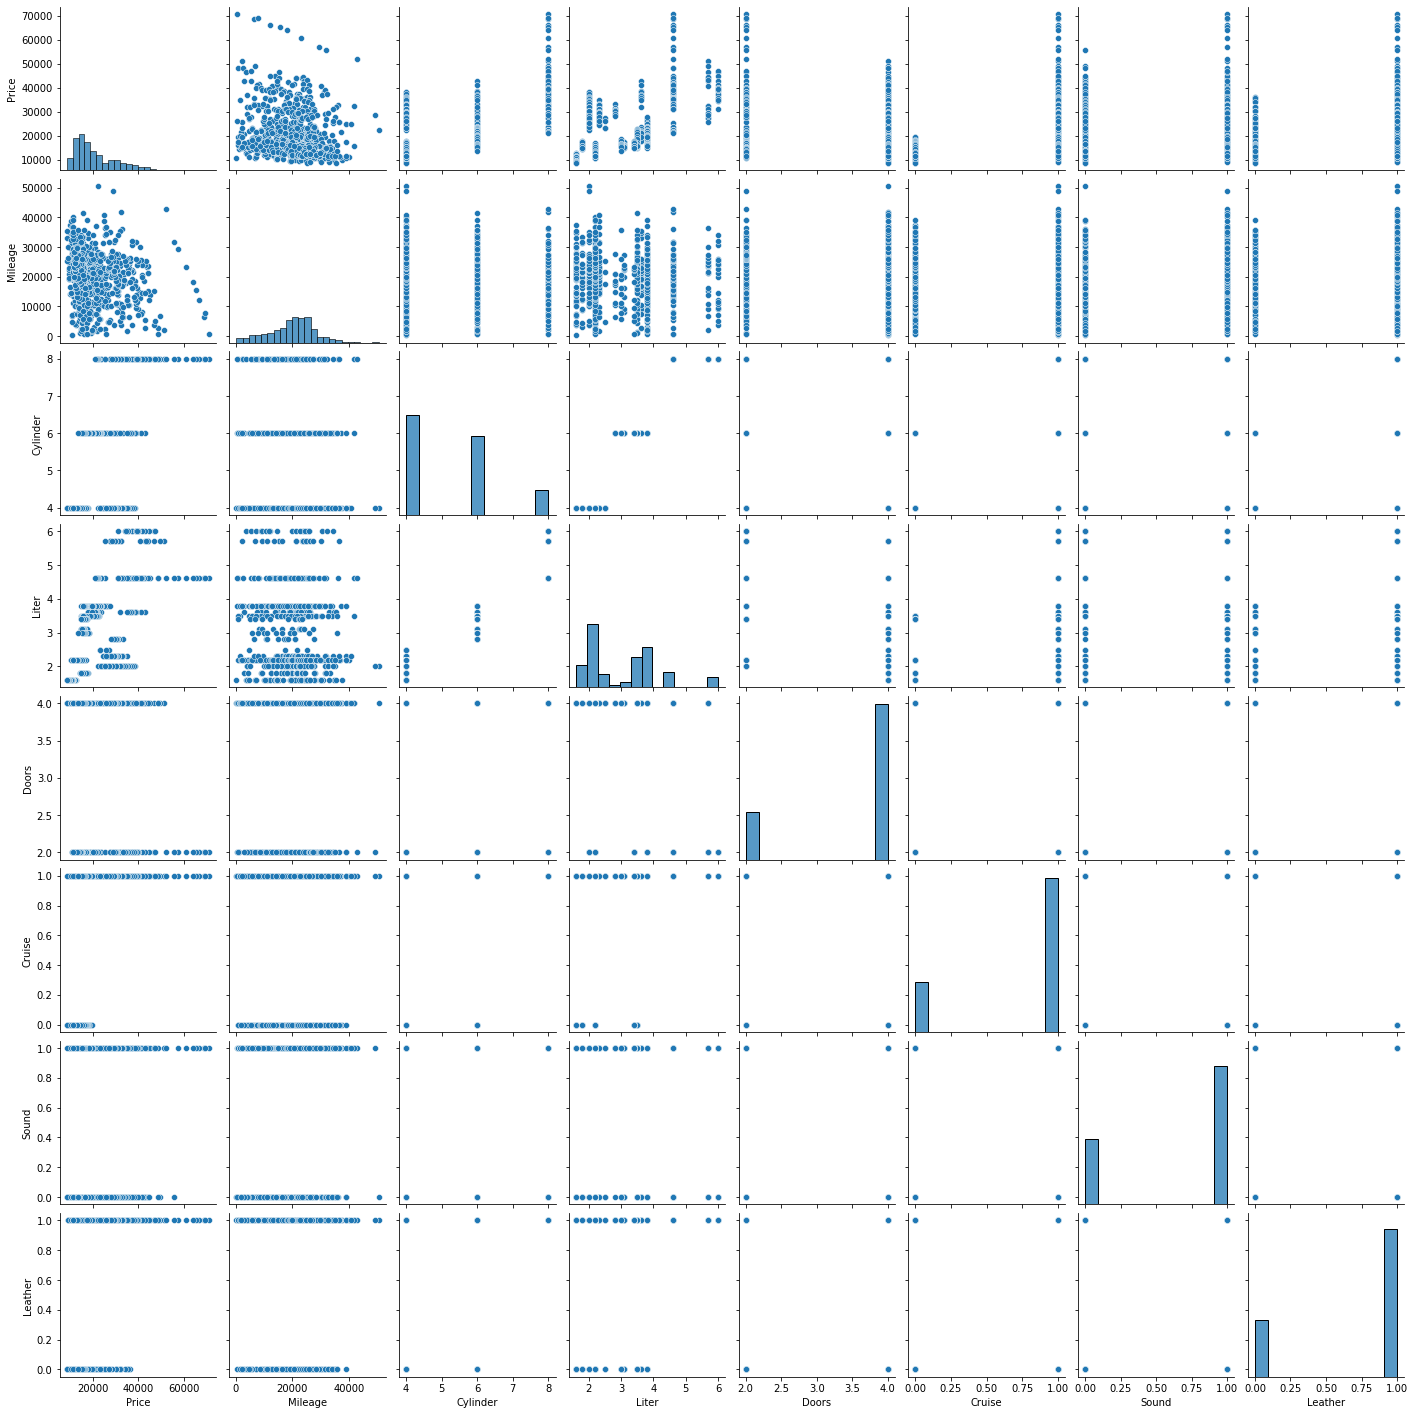

In [ ]:
import seaborn as sns
sns.pairplot(df)

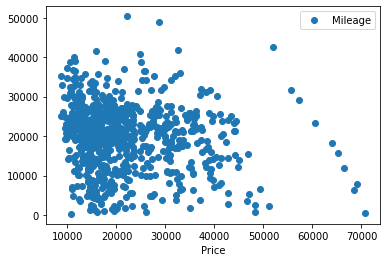

In [ ]:
df.plot(x="Price",y="Mileage",style="o")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


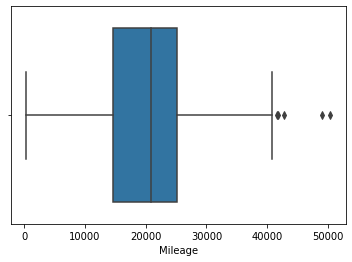

In [ ]:
sns.boxplot(df["Mileage"])

In [ ]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
print("25th percentile of the data is ",Q1)
print("75th percentile of the data is ",Q1)
IQR= Q3 - Q1
print("IQR :", IQR)

25th percentile of the data is  14623.5
75th percentile of the data is  14623.5
IQR : 10589.5


In [ ]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

41097.25
-1260.75


In [ ]:
df['Mileage'] = np.where(
    df['Mileage']>max_value,
    max_value,
    np.where(
        df['Mileage']<min_value,
        min_value,
        df['Mileage']
    ) 
)

In [ ]:
df['Mileage'].describe()

count      804.000000
mean     19807.086132
std       8119.836852
min        266.000000
25%      14623.500000
50%      20913.500000
75%      25213.000000
max      41097.250000
Name: Mileage, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


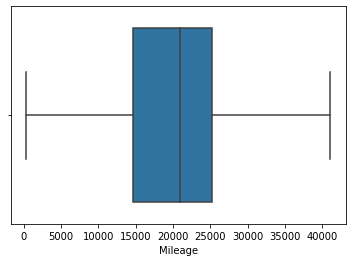

In [ ]:
sns.boxplot(df['Mileage'])

In [ ]:
X=df[["Mileage"]].values
y=df["Price"].values

In [ ]:
len(X)

804

In [ ]:
len(y)

804

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=5)

In [ ]:
X_train.shape,X_test.shape

((562, 1), (242, 1))

In [ ]:
Y_train.shape,Y_test.shape

((562,), (242,))

In [ ]:
from sklearn.linear_model import LinearRegression # import required functiom
regressor = LinearRegression() # initialize 
regressor.fit(X_train,Y_train) 

LinearRegression()

In [ ]:
m=regressor.coef_
c=regressor.intercept_
pred=m*8221+c
print("y =",pred)# predicted output

y = [23347.52934058]


In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([20637.4099093 , 23756.92291971, 18217.96574826, 19565.4476995 ,
       24367.22440621, 17375.2794869 , 23041.69854155, 18606.95765401,
       18719.65261172, 16959.61967952, 20010.78708411, 17357.59803664,
       20526.46366645, 21546.93593869, 18563.23978248, 19844.46487066,
       20190.51611149, 20838.90072162, 19942.19860122, 20577.17639742,
       21637.86911146, 21233.72167691, 22078.15665313, 21397.51796889,
       20499.06713363, 22112.1594421 , 19238.63232214, 22064.55553755,
       19951.91368378, 19587.20948444, 20478.66546025, 21338.25596527,
       21713.06385048, 20959.36774538, 23459.44709169, 23243.96656048,
       20959.75634869, 24385.48876142, 21081.583484  , 23631.20975137,
       20793.23983359, 21094.60169464, 22357.17382429, 22287.22522985,
       21039.42002569, 22687.29232972, 24040.9919338 , 21409.56467127,
       24717.74458502, 23697.46661444, 22135.08703694, 23323.43593583,
       22118.57139659, 21270.63899064, 22258.07998217, 20152.43298785,
      

In [ ]:
print(len(y_pred))

242


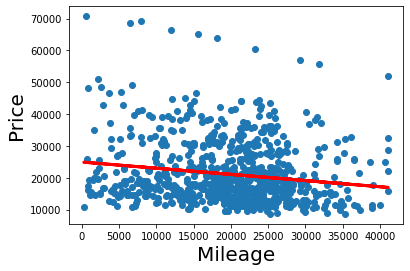

In [ ]:
plt.scatter(X,y)                     
y_new = regressor.coef_*X + regressor.intercept_            
plt.plot(X,y_new, 'r',lw=3, label='regression line') 
                                                     
plt.xlabel('Mileage', fontsize=20)      
plt.ylabel('Price', fontsize=20)       
plt.show()  # this shows Price vs Mileage is slightly negatively corelated and it has  negative-linear relationship.

In [ ]:
from sklearn import metrics
print("R_2 score value :",metrics.r2_score(Y_test,y_pred))

R_2 score value : 0.004916607226404968


For Mileage Vs Price:

There is a negative corelation between Mileage vs Price, less than 0.8

The R2 _score value for this Mileage Vs price Model is 0.004*100 = 4 % .

This model is Negative Linear-Relationship..

In [ ]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.146283,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.146283,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569086,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [ ]:
X_1 = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
Y_1 = df['Price'].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
scaler.var_

array([6.48754829e+07, 1.95342110e+00, 1.26893639e+00, 7.31795215e-01,
       1.89237367e-01, 2.21526718e-01, 2.00193978e-01])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns=['Coefficient'])

coeff_df

,Coefficient
Mileage,-1416.068194
Cylinder,6098.887632
Liter,-1689.147809
Doors,-1501.492000
Cruise,2849.720811
Sound,-761.114644
Leather,1392.133161


In [ ]:

y_pred = regressor.predict(X_test_scaled)
y_pred

array([12403.3409458 , 24395.10694718, 23760.17238413, 11660.28515387,
       32869.62719077, 14191.96339621, 24681.28532471, 25272.60550812,
       21159.06168252, 14708.05258316, 23288.80892751, 18184.27006596,
       25581.85550637, 19651.05295092, 19556.6407912 , 18496.30281609,
       13916.80802343, 17955.59750196, 17699.0341392 , 35202.80327195,
       19064.44122103, 18803.79471316, 11302.50863622, 19776.17048408,
       25420.81437072, 31070.24686694, 26340.21613157, 21482.28901795,
       23050.646421  , 34701.56862441, 35216.51739397, 17867.80135155,
       22492.11021237, 20787.13580983, 10881.19883123, 24946.95931239,
       27260.32817694, 24816.2232195 , 27734.47459596,  8790.18497112,
       24513.07964891, 19948.52460403, 22049.6377602 , 34706.72219508,
       25286.71511291, 10447.01952685, 11911.51781305, 18250.00745382,
       24091.60565013, 22879.79754283, 18986.58946421, 20734.74439455,
       23569.12299763, 18953.15434888, 27007.62971007, 14458.97643465,
      

In [ ]:
len(y_pred)

161

In [ ]:
regressor.intercept_  # C - value

21526.41105814825

In [ ]:
regressor.coef_  # slope - Value

array([-1416.0681935 ,  6098.88763224, -1689.14780872, -1501.4919999 ,
        2849.72081073,  -761.11464358,  1392.13316056])

In [ ]:
# Linear Regressor Equation 
m=regressor.coef_
c=regressor.intercept_
y=regressor.predict([[8221,7,5.1,4,1,2,2]]) #y=mx+c
print('y=',y)

y= [-11587786.85829144]


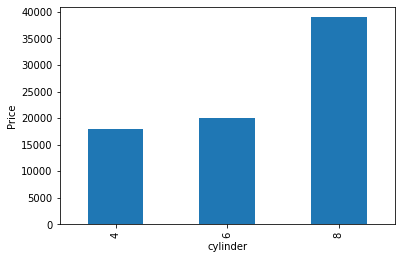

In [ ]:
df.groupby("Cylinder")["Price"].mean().plot(kind="bar")
plt.xlabel("cylinder")
plt.ylabel("Price")
plt.show()

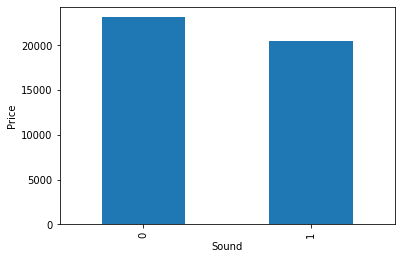

In [ ]:
df.groupby("Sound")["Price"].mean().plot(kind="bar")
plt.xlabel("Sound")
plt.ylabel("Price")
plt.show()

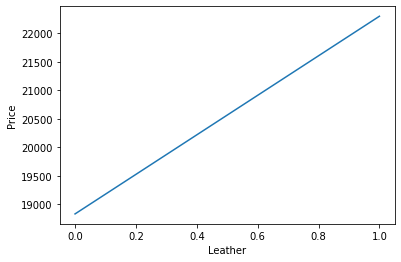

In [ ]:
df.groupby("Leather")["Price"].mean().plot()
plt.xlabel("Leather")
plt.ylabel("Price")
plt.show()

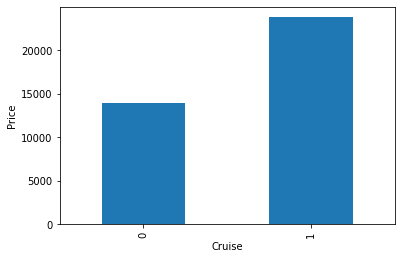

In [ ]:
df.groupby("Cruise")['Price'].mean().plot(kind="bar")
plt.xlabel("Cruise")
plt.ylabel("Price")
plt.show()

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4113470342532586


Model Two:

No Feature in this model has corelation greater than 0.8

This model shows R2 Score value of 41 % .

Finnaly thismodel is not good fit because no feature has corealtion has greater than 0.8 and this model R2 score value is also low.

In this model Cylinder and Cruise are the factors for the best price prediction.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


# **Task** - **Hard** **Mode**

In [ ]:
df=pd.get_dummies(df,columns=["Make","Model","Trim","Type"])
df.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D',
       'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Se

In [ ]:
X=df[['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']].values
y=df["Price"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
#Scallig..
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 


In [ ]:
scaler.var_

array([0.08962653, 0.0921081 , 0.24085196, 0.1458608 , 0.12149503,
       0.06907744, 0.00310075, 0.02573957, 0.05008115, 0.03449035,
       0.02278395, 0.06775201, 0.03449035, 0.01228688, 0.01380098,
       0.0717138 , 0.01228688, 0.01076795, 0.05833851, 0.02721013,
       0.03736858, 0.01980897, 0.01531023, 0.02129888, 0.03159277,
       0.03736858, 0.05833851, 0.01228688, 0.03304398, 0.03013673,
       0.07039804, 0.03593188, 0.02129888, 0.01380098, 0.00924419,
       0.00924419, 0.04022745, 0.01380098, 0.06240189, 0.14384362,
       0.07039804, 0.2389799 , 0.0717138 ])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([-3.49984137e+16,  4.30247827e+16,  4.96594559e+16, -1.09240195e+17,
       -3.68753874e+16,  5.18853081e+15, -2.66781081e+13, -7.68639402e+13,
       -1.07215882e+14, -8.89755700e+13, -7.23163449e+13, -5.40001313e+16,
        3.33840550e+16, -2.74940125e+16, -2.91388329e+16, -5.55565292e+16,
        1.17851640e+15, -2.15278340e+16, -5.01085008e+16, -3.42214982e+16,
       -4.79480016e+16,  2.53000439e+16,  2.22423760e+16,  2.62342507e+16,
        3.19509786e+16, -4.01039360e+16, -3.04365068e+16, -1.39681218e+16,
        1.93268428e+15,  1.84570715e+15, -5.50445112e+16, -3.93254501e+16,
        1.55164767e+15, -2.91388329e+16, -2.38479806e+16,  1.72832203e+16,
        3.60538429e+16, -2.91388329e+16, -4.86291130e+15, -7.38316827e+15,
       -5.16508838e+15, -9.51651976e+15, -5.21313346e+15])

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'], columns=['Coefficient'])

coeff_df

,Coefficient
Make_Buick,-3.499841e+16
Make_Cadillac,4.302478e+16
Make_Chevrolet,4.965946e+16
Make_Pontiac,-1.092402e+17
Make_SAAB,-3.687539e+16
Make_Saturn,5.188531e+15
Model_9-2X AWD,-2.667811e+13
Model_9_3,-7.686394e+13
Model_9_3 HO,-1.072159e+14
Model_9_5,-8.897557e+13


In [ ]:

y_pred = regressor.predict(X_test_scaled)
y_pred

array([10779.49256445, 36470.49256445, 20590.49256445, 17022.49256445,
       37246.49256445, 13092.49256445, 21256.49256445, 18590.49256445,
       20590.49256445, 13726.49256445, 19414.49256445, 29922.49256445,
       21918.49256445, 29922.49256445, 13736.49256445, 17467.49256445,
       17022.49256445, 28984.49256445, 29454.49256445, 20862.49256445,
       10779.49256445, 17467.49256445, 10302.49256445, 18590.49256445,
       20862.49256445, 13760.49256445, 20030.49256445, 13092.49256445,
       23038.49256445, 37246.49256445, 43998.49256445, 12904.49256445,
       35880.49256445, 13736.49256445, 14136.49256445, 19414.49256445,
       21256.49256445, 30110.49256445, 20862.49256445, 12510.49256445,
       12904.49256445, 26990.49256445, 16334.49256445, 33656.49256445,
       19414.49256445, 13342.49256445, 13726.49256445, 17022.49256445,
       20030.49256445, 14306.49256445, 16466.49256445, 13736.49256445,
       28984.49256445, 10779.49256445, 19414.49256445, 30034.49256445,
      

In [ ]:
df= pd.DataFrame({"Actual": y_test,"Predicted": y_pred})
df.head()

,Actual,Predicted
0,11391.213718,10779.492564
1,35895.499410,36470.492564
2,22358.877678,20590.492564
3,13436.000149,17022.492564
4,35338.653690,37246.492564


In [ ]:
from sklearn import metrics
print("R2 score : ",metrics.r2_score(y_test,y_pred))

R2 score :  0.9166489103914935


In [ ]:
#Recursive Feature Estimation - Feature selection model that fits a model..
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],selector.support_))

[('Make_Buick', True),
 ('Make_Cadillac', True),
 ('Make_Chevrolet', False),
 ('Make_Pontiac', False),
 ('Make_SAAB', False),
 ('Make_Saturn', False),
 ('Model_9-2X AWD', False),
 ('Model_9_3', False),
 ('Model_9_3 HO', False),
 ('Model_9_5', False),
 ('Model_9_5 HO', False),
 ('Model_AVEO', False),
 ('Model_Bonneville', False),
 ('Model_CST-V', False),
 ('Model_CTS', False),
 ('Model_Cavalier', False),
 ('Model_Century', True),
 ('Model_Classic', False),
 ('Model_Cobalt', False),
 ('Model_Corvette', False),
 ('Model_Deville', False),
 ('Model_G6', False),
 ('Model_GTO', False),
 ('Model_Grand Am', False),
 ('Model_Grand Prix', False),
 ('Model_Impala', False),
 ('Model_Ion', False),
 ('Model_L Series', False),
 ('Model_Lacrosse', True),
 ('Model_Lesabre', True),
 ('Model_Malibu', False),
 ('Model_Monte Carlo', False),
 ('Model_Park Avenue', True),
 ('Model_STS-V6', False),
 ('Model_STS-V8', False),
 ('Model_Sunfire', False),
 ('Model_Vibe', False),
 ('Model_XLR-V8', False),
 ('Type_Co

R2 Score for this model is 91 % 

The best combinations factors for predicting price are **Make_Buick**, **Make_cadillac**, **Make_century**,**Make_Lacrosse**,**Make_Lesabre**,**Make_Park_Avenue**..